In [1]:
import path
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import preprocessing as pp
import confusion_matrix as cm

from sklearn.metrics import classification_report

In [2]:
np.random.seed(13)
tf.random.set_seed(13)

In [3]:
X_train, X_test, y_train, y_test, X_columns, y_columns = pp.load_data('no_measures', y_goal_diff=True)

In [4]:
# X_train, X_test, X_columns = pp.preprocess_X(return_arrays=True, save_as_file=True,             suffix='no_measures')

In [5]:
# y_train, y_test, y_columns = pp.preprocess_y(y_goal_diff=True, save_as_file=True,             suffix='no_measures')

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(list(X_columns.keys()))
print(list(y_columns.keys()))

(8995, 366, 12)
(2249, 366, 12)
(8995,)
(2249,)
['st_x', 'st_y', 'event_blocked_shot', 'event_faceoff', 'event_giveaway', 'event_hit', 'event_missed_shot', 'event_penalty', 'event_shot', 'event_takeaway', 'event_dummy', 'home_team_for']
['goal_diff']


In [7]:
print(np.mean(y_train))
print(np.mean(y_test))

0.28237909949972206
0.22987994664295242


In [8]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [9]:
model_mlp.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 7196 samples, validate on 1799 samples
Epoch 1/10
7196/7196 [==============================] - 5s 641us/sample - loss: 5.5301 - mae: 1.8777 - val_loss: 5.3777 - val_mae: 1.8200
Epoch 2/10
7196/7196 [==============================] - 3s 368us/sample - loss: 5.0547 - mae: 1.7797 - val_loss: 4.9395 - val_mae: 1.7492
Epoch 3/10
7196/7196 [==============================] - 3s 361us/sample - loss: 4.5625 - mae: 1.6763 - val_loss: 4.6324 - val_mae: 1.6757
Epoch 4/10
7196/7196 [==============================] - 4s 553us/sample - loss: 4.2757 - mae: 1.6160 - val_loss: 4.5809 - val_mae: 1.6685
Epoch 5/10
7196/7196 [==============================] - 3s 457us/sample - loss: 4.1316 - mae: 1.5883 - val_loss: 4.5294 - val_mae: 1.6584
Epoch 6/10
7196/7196 [==============================] - 3s 382us/sample - loss: 4.0276 - mae: 1.5738 - val_loss: 4.5005 - val_mae: 1.6513
Epoch 7/10
7196/7196 [==============================] - 3s 422us/sample - loss: 3.8930 - mae: 1.5390 - val_loss: 4.4594 - va

In [10]:
results_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)
y_pred_mlp = model_mlp.predict(X_test).flatten()

print("Mean squared error for feedforward network:", results_mlp[0])
print("Mean absolute error for feedforward network:", results_mlp[1])

Mean squared error for feedforward network: 4.383348115341777
Mean absolute error for feedforward network: 1.629597


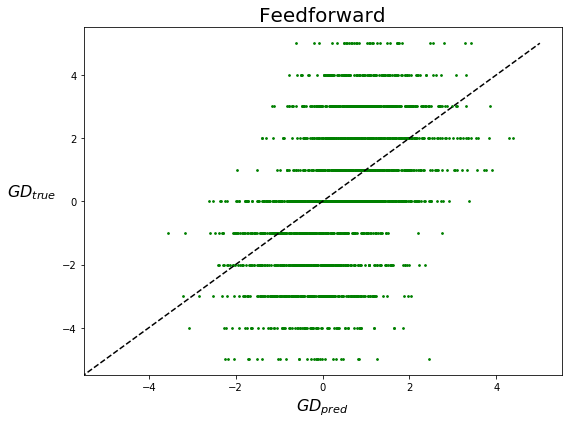

In [11]:
plt.subplots(figsize=(8, 6))

points = np.arange(-6, 6)

plt.scatter(y_pred_mlp, y_test, c='green', s=3)
plt.plot(points, points, linestyle='dashed', color='black')

plt.xlabel('$GD_{pred}$', fontsize=16)
plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Feedforward', fontsize=20)

plt.xlim((-5.5, 5.5))
plt.ylim((-5.5, 5.5))

plt.tight_layout()
plt.savefig("img/GDtrue_vs_GDpred_mlp.png")

plt.show()

In [54]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 12, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Conv1D(32, 8, activation='relu'),
    tf.keras.layers.AveragePooling1D(3),
    tf.keras.layers.Conv1D(16, 6, activation='relu'),
    tf.keras.layers.Conv1D(16, 6, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [55]:
model_cnn.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 7196 samples, validate on 1799 samples
Epoch 1/100
7196/7196 [==============================] - 11s 2ms/sample - loss: 5.4763 - mae: 1.8422 - val_loss: 5.4120 - val_mae: 1.8355
Epoch 2/100
7196/7196 [==============================] - 13s 2ms/sample - loss: 5.4389 - mae: 1.8455 - val_loss: 5.3968 - val_mae: 1.8383
Epoch 3/100
7196/7196 [==============================] - 11s 2ms/sample - loss: 5.3460 - mae: 1.8301 - val_loss: 5.1782 - val_mae: 1.7908
Epoch 4/100
7196/7196 [==============================] - 11s 2ms/sample - loss: 5.0400 - mae: 1.7494 - val_loss: 4.6211 - val_mae: 1.6433
Epoch 5/100
7196/7196 [==============================] - 11s 2ms/sample - loss: 4.5759 - mae: 1.6479 - val_loss: 4.4392 - val_mae: 1.6012
Epoch 6/100
7196/7196 [==============================] - 10s 1ms/sample - loss: 4.4118 - mae: 1.6053 - val_loss: 4.2697 - val_mae: 1.5604
Epoch 7/100
7196/7196 [==============================] - 10s 1ms/sample - loss: 4.0255 - mae: 1.5279 - val_loss: 4.2090 - va

In [58]:
results_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
y_pred_cnn = model_cnn.predict(X_test).flatten()

print("Test mean squared error for convolutional network:", results_cnn[0])
print("Test mean absolute error for convolutional network:", results_cnn[1])

Test mean squared error for convolutional network: 5.998541281137428
Test mean absolute error for convolutional network: 1.855289


In [56]:
y_pred_train_cnn = model_cnn.predict(X_train).flatten()

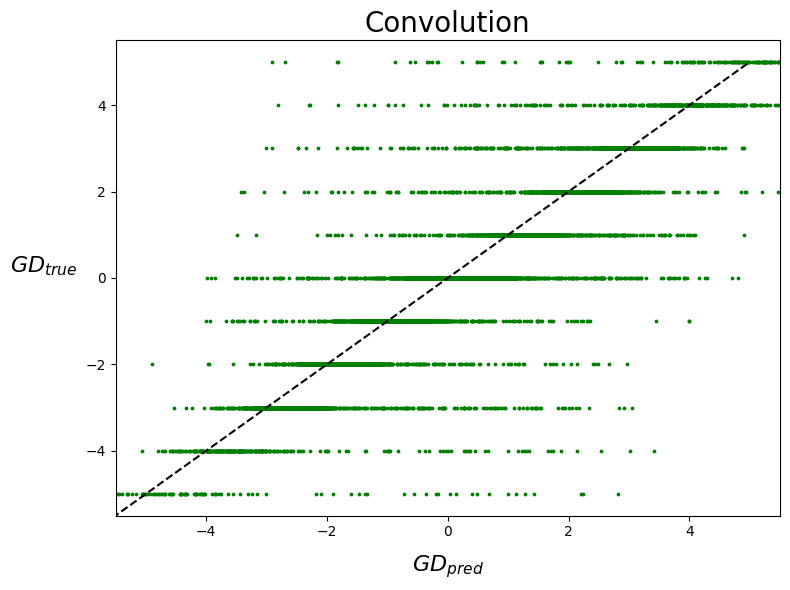

In [57]:
plt.subplots(figsize=(8, 6))

plt.scatter(y_pred_train_cnn, y_train, c='green', s=3)
plt.plot(points, points, linestyle='dashed', color='black')

plt.xlabel('$GD_{pred}$', fontsize=16, labelpad=10)
plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Convolution', fontsize=20)

plt.xlim((-5.5, 5.5))
plt.ylim((-5.5, 5.5))

plt.tight_layout()
# plt.savefig("img/GDtrue_vs_GDpred_cnn.png")

plt.show()

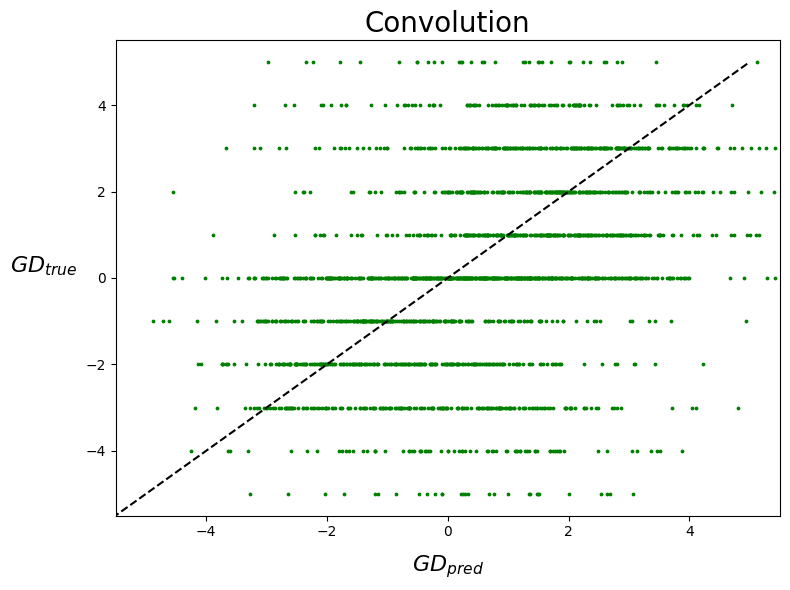

In [59]:
plt.subplots(figsize=(8, 6))

plt.scatter(y_pred_cnn, y_test, c='green', s=3)
plt.plot(points, points, linestyle='dashed', color='black')

plt.xlabel('$GD_{pred}$', fontsize=16, labelpad=10)
plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
plt.title('Convolution', fontsize=20)

plt.xlim((-5.5, 5.5))
plt.ylim((-5.5, 5.5))

plt.tight_layout()
# plt.savefig("img/GDtrue_vs_GDpred_cnn.png")

plt.show()

In [35]:
game_stats = pd.read_csv("data/csv/game_teams_stats.csv")
id_test = np.load('data/no_measures/id/id_test.npy')

home = game_stats.loc[game_stats['HoA']=='home']
away = game_stats.loc[game_stats['HoA']=='away']
game_stats = home.merge(away, on='game_id', suffixes=['_home', '_away'])
game_stats = game_stats.loc[game_stats['game_id'].isin(id_test), :]

game_stats = game_stats.sort_values(by='game_id')

In [36]:
print(game_stats['game_id'].all() == np.sort(id_test).all())

True


In [37]:
def pdo(x):
    return 100*(x[0]/(x[2]+x[0]) + x[3]/(x[1]+x[3]))

In [38]:
game_stats['pdo_home'] = game_stats.loc[:, ['goals_home', 'goals_away', 
                                            'shots_home', 'shots_away']].apply(pdo, axis=1)

game_stats['pdo_away'] = game_stats.loc[:, ['goals_away', 'goals_home', 
                                            'shots_away', 'shots_home']].apply(pdo, axis=1)

In [39]:
# pred_diff_cnn = y_test-y_pred_cnn
corr_cnn = np.corrcoef(game_stats['pdo_home'].to_numpy(), y_pred_cnn[np.argsort(id_test)])[0, 1]

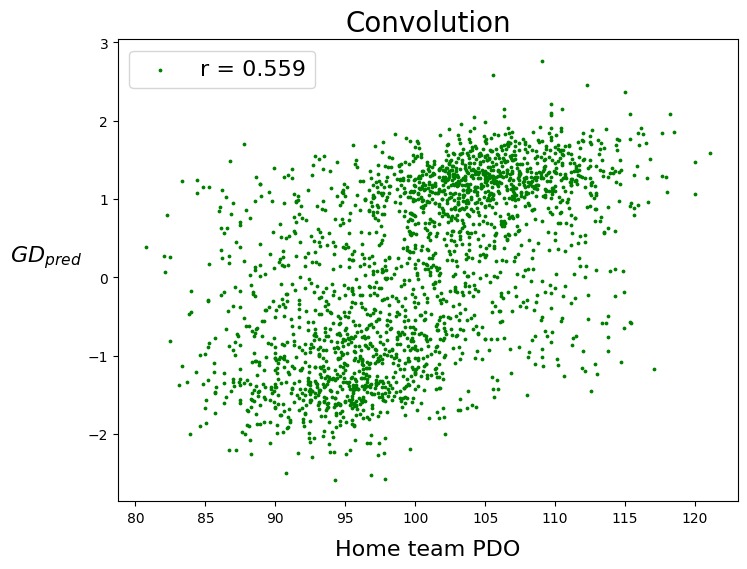

In [40]:
plt.subplots(figsize=(8, 6))

plt.scatter(game_stats['pdo_home'].to_numpy(), y_pred_cnn[np.argsort(id_test)], c='green', s=3, label='r = {0}'.format(np.around(corr_cnn, 3)))

plt.legend(fontsize=16)

plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.xlabel('Home team PDO', fontsize=16, labelpad=10)
plt.title('Convolution', fontsize=20)

plt.show()

In [41]:
# pred_diff_mlp = y_test-y_pred_mlp
corr_mlp = np.corrcoef(game_stats['pdo_home'].to_numpy(), y_pred_mlp[np.argsort(id_test)])[0, 1]

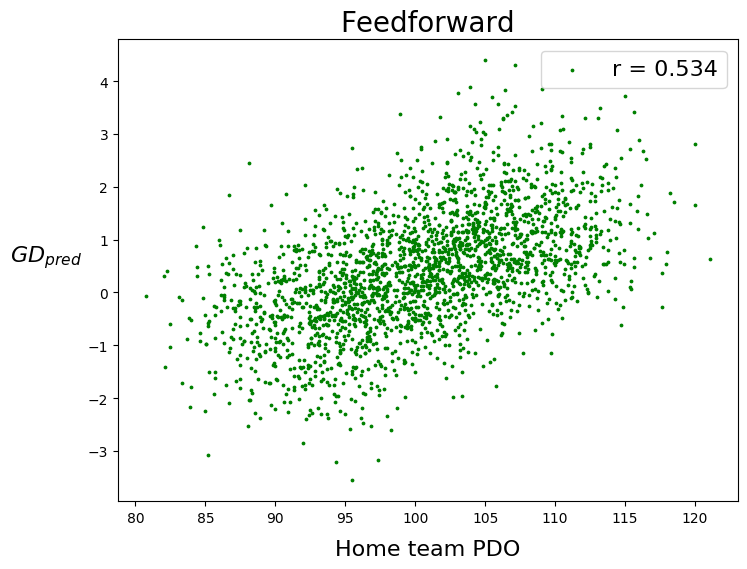

In [51]:
plt.subplots(figsize=(8, 6))

plt.scatter(game_stats['pdo_home'].to_numpy(), y_pred_mlp[np.argsort(id_test)], c='green', s=3, label='r = {0}'.format(np.around(corr_mlp, 3)))

plt.legend(fontsize=16)

plt.ylabel('$GD_{pred}$', fontsize=16, rotation=0, labelpad=30)
plt.xlabel('Home team PDO', fontsize=16, labelpad=10)
plt.title('Feedforward', fontsize=20)

# plt.savefig()

plt.show()

In [ ]:
def result(goal_diff):
    if np.abs(goal_diff) <= 0.5:
        return 1
    elif goal_diff > 0:  
        return 0
    else:
        return 2    

In [ ]:
y_pred_result_cnn = np.zeros(len(y_pred_cnn))
for i in range(len(y_pred_cnn)):
    y_pred_result_cnn[i] = result(y_pred_cnn[i])

In [ ]:
y_test_result = np.load('data/no_measures/numpy/y_test_result.npy')

In [ ]:
print("Accuracy: ", np.sum(y_pred_result_cnn == y_test_result.argmax(axis=1)) / len(y_test_result))

In [ ]:
classes = ['home win', 'tie (OT/SO)', 'away win']

for i in range(len(classes)):
    print("Predicted result " + classes[i] + ":\t", np.sum(y_pred_result_cnn == i))

In [ ]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(5,5))

cm.plot(y_test_result.argmax(axis=1), y_pred_result_cnn, classes=classes, normalize=False, title=" ", show_colorbar=False, ax=ax)

fig.tight_layout()
fig.savefig('img/confusion_matrix_cnn_convert.png')

plt.show()

In [ ]:
print(classification_report(y_test_result.argmax(axis=1), y_pred_result_cnn, target_names=classes))